## TITANIC SURVIVAL PREDICTION

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Droping unnecessary Columns in the dataset

In [5]:
new_df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
new_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
new_df.describe().round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


In [7]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Handling Null Values and Pre Processing the dataset.


In [8]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())

In [9]:
new_df['Embarked']=new_df['Embarked'].fillna(new_df['Embarked'].value_counts().idxmax())

In [10]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

every columns are free from missing value


# Exploratory Data Analysis

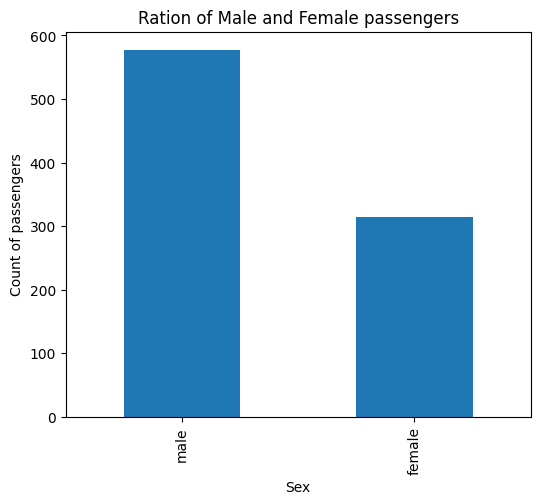

In [11]:
# Data Visualization
ax1 = new_df['Sex'].value_counts().plot(kind='bar',x='Survived',
                                       figsize=(6,5))
plt.title("Ration of Male and Female passengers")
plt.ylabel("Count of passengers")
plt.xlabel("Sex")
plt.show()

<p>Here we cann see there is more male passengers than female passenger
</p>

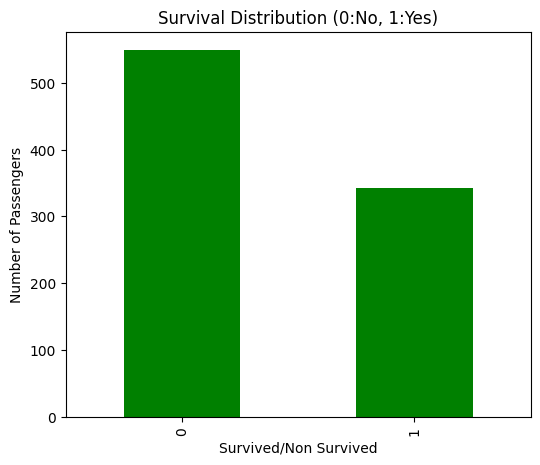

In [12]:
new_df['Survived'].value_counts().plot(kind='bar',
                                      figsize=(6,5),color="g")
plt.title("Survival Distribution (0:No, 1:Yes)")
plt.ylabel("Number of Passengers")
plt.xlabel("Survived/Non Survived")
plt.show()

<p>From the above graph we can conclude there is more number of deaths than Survived passengers. Rest in peace.</p>

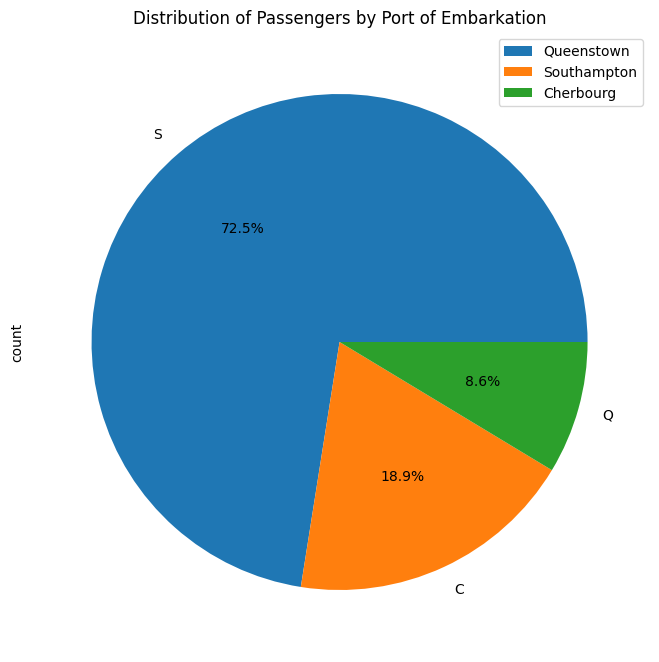

In [13]:
new_df['Embarked'].value_counts().plot(kind='pie',figsize=(8,20), autopct = '%1.1f%%')
plt.title("Distribution of Passengers by Port of Embarkation")
plt.legend(['Queenstown','Southampton','Cherbourg'])
plt.show()

<p>From the above pie chart the most passengers are from Southampton</p>

/tmp/ipykernel_3956/561260779.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Q','S','C'])


[]

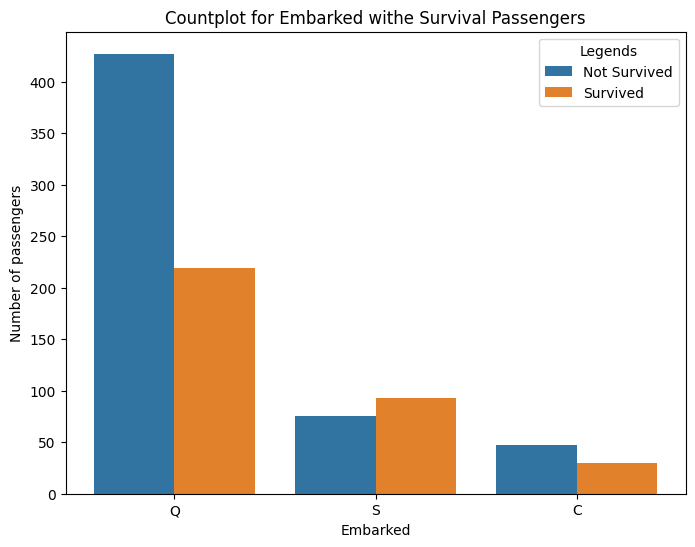

In [20]:
_, ax = plt.subplots(figsize=(8,6))
sns.countplot(data = new_df, x = "Embarked", hue = "Survived", ax = ax)
ax.set_title("Countplot for Embarked withe Survival Passengers")
ax.set_xlabel("Embarked")
ax.set_xticklabels(['Q','S','C'])
ax.set_ylabel("Number of passengers")
ax.legend(title = 'Legends', labels = ['Not Survived','Survived'])
plt.plot()

# Developing Machine learning model to predict survival

<p>
    Changing the categorical data into numerical data by using Label Encoder
</p>

In [21]:
new_df['Sex'] = new_df['Sex'].apply({'male':1, 'female':0}.get)


In [22]:
new_df['Embarked'] = new_df['Embarked'].apply({'S':1, 'Q':2,'C':3}.get)

In [23]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,3
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


### Dividing data into Dependent and independent variable for model development

In [24]:
x = new_df.drop(['Survived'],axis=1)
y = new_df['Survived']

Diving data into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=3)

In [26]:
print("size of x_train dataset ",x_train.shape)

size of x_train dataset  (712, 7)


In [27]:
print("size of x_test dataset",x_test.shape)

size of x_test dataset (179, 7)


In [28]:
print("Size of y_train dataset ",y_train.shape)

Size of y_train dataset  (712,)


In [29]:
print("Size of y_test dataset ",y_test.shape)

Size of y_test dataset  (179,)


# Machine learning models


### 1. DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [31]:
DecisionTree = DecisionTreeClassifier()

In [33]:
# Training Data
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
DecisionTree

DecisionTreeClassifier()

In [36]:
Predictions = DecisionTree.predict(x_test)
print(Predictions)

[0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1]


#### DecisionTree Model Evaluation

In [48]:
from sklearn import metrics
accuracyScore = metrics.accuracy_score(y_test,Predictions)
accuracyScore2 = metrics.confusion_matrix(y_test,Predictions)
print("Accuracy of the DecisionTree model is ",accuracyScore)
print("Accuracy score using confusion_matrix is ",accuracyScore2)

Accuracy of the DecisionTree model is  0.7877094972067039
Accuracy score using confusion_matrix is  [[87 22]
 [16 54]]


<p>We can see Our Decision Tree model is 78% accurate</p>

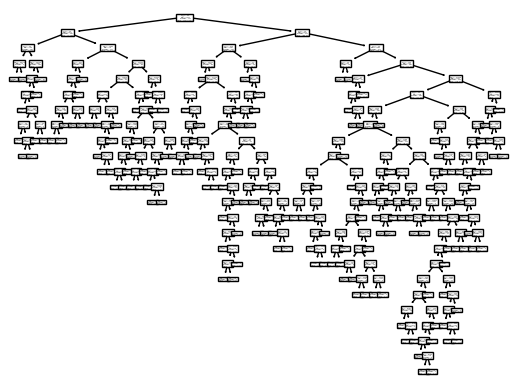

In [47]:
tree.plot_tree(DecisionTree)
plt.figsize=(20,20)
plt.show()

<p> The model is 78% accurate in prediction of the survival of the passengers</p>

### 2. Support Vector Machine (SVM) Machine learning Model

In [51]:
from sklearn import svm
Classification1 = svm.SVC(kernel = 'rbf')


In [52]:
#Trainin data
Classification1.fit(x_train,y_train)

SVC()

In [54]:
# Prediction
Prediction2 = Classification1.predict(x_test)
print(Prediction2)

[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [57]:
# Model Evaluation
from sklearn import metrics
accuracyScore1 = metrics.accuracy_score(y_test,Prediction2)
conMatrix1 = metrics.confusion_matrix(y_test,Prediction2)


In [58]:
print("Accuracy of model is ",accuracyScore1)

Accuracy of model is  0.6089385474860335


In [60]:
print("Confusion matrix of model is \n",conMatrix1)

Confusion matrix of model is 
 [[94 15]
 [55 15]]


<p> The model is 60% accurate in prediction of the survival of the passengers</p>

### 3. K-Neighbour-Nearest Machine learning Model

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
neigh = KNeighborsClassifier(n_neighbors =  4)
neigh

KNeighborsClassifier(n_neighbors=4)

In [66]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
Prediction2 = neigh.predict(x_test)

In [69]:
print(Prediction2)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]


In [71]:
# Evaluation of the Model
accuracyScore2 = metrics.accuracy_score(y_test,Prediction2)
print("The Accuracy of the model is",accuracyScore2)

The Accuracy of the model is 0.6536312849162011


In [72]:
con_Matrix = metrics.confusion_matrix(y_test,Prediction2)
print(con_Matrix)

[[88 21]
 [41 29]]


<p>The KNN model is 65% accurate</p>

# Conclusions

<p>The best suitable Classification Model for this Titanic Dataset to predict the survival of passenger is DecisionTreeClassifier Model.
The model have 75% Accuracy score Which show it can predict the passenger survival chances better than KNN and SVM Classifications</p>

### Author
<h3>Suresh Tamang</h3>
